In [1]:
import sys
import os
sys.path.append('..')

In [2]:
from workspace import nometools as nome

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pickle
import scipy
from scipy import stats

In [12]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'delete/'
tmp_path = data_path + 'promoter/'
steric_path = main_path + 'delete/steric_clash/'

In [13]:
region = 'promoter'

In [14]:
np.random.seed(1234)

In [15]:
from scipy.stats import chi2_contingency
import multiprocessing 

In [ ]:
# def getGCHcount_in_window(window, res, pos):
#     '''
#         element in res = ['chr20', 60110, 60111, '+', 0.0, 3]
#     '''
#     start, end = window
#     freq = []
#     meth_c_count = 0
#     net_c_count = 0
#     for itr in range(pos, len(res)):
#         if start > res[itr][1]:
#             ## increase the start of the search such that we start near the window
#             pos += 1
#         elif start <= res[itr][1] and end >= res[itr][1]:
#             freq.append((res[itr][1], res[itr][4], res[itr][5], round(res[itr][4]*res[itr][5]/100)))
#             meth_c_count += round(res[itr][4]*res[itr][5]/100)
#             net_c_count += res[itr][5]
#         elif end < res[itr][1]:
#             ## the rest of sites are away from the window
#             break

#     unmeth_c_count = net_c_count - meth_c_count
#     return meth_c_count, unmeth_c_count, freq, pos

In [ ]:
# def findNDR(filtered_res, chr, win_len = 100, multiprocess=False, temp_loc=None):
#     if multiprocess:
#         if temp_loc is None:
#             raise Exception('Input temp loc missing')

#     start = filtered_res[0][1] - 90
#     end = start + win_len
#     step = 20
#     pos_window = 0
#     pos_bg_left = 0
#     pos_bg_right = 0

#     n = (filtered_res[-1][1] - filtered_res[0][1])/step
#     progress_check = int(n/20)

#     print(f'Finding NDR windows for {chr} with window len {win_len}')

#     regions = []
#     itr_count = 0
#     curr_time = time.time()
#     while (start < filtered_res[-1][1]):
#         if itr_count != 0 and itr_count%progress_check == 0:
#             print('progress for {} : {}% and time elapsed {} min'.format(chr, round(itr_count*100/n,2), round((time.time()-curr_time)/60,2)))
        
#         window = (start, end)
#         meth_c_count, unmeth_c_count, freq, pos_window = getGCHcount_in_window(window, filtered_res, pos_window)

#         if not meth_c_count > 0:
#             start += step
#             end += step
#             itr_count += 1
#             continue
        
#         window_bf_left = (start-4000, start)
#         meth_c_count_bg_left, unmeth_c_count_bg_left, freq_bg_left, pos_bg_left = getGCHcount_in_window(window_bf_left, filtered_res, pos_bg_left)
        
#         window_bf_right = (end, end+4000)
#         meth_c_count_bg_right, unmeth_c_count_bg_right, freq_bg_right, pos_bg_right = getGCHcount_in_window(window_bf_right, filtered_res, pos_bg_right)

#         '''
#                     Window(NDR)         background
#             Meth    meth_c_count    meth_c_count_bg
#             Unmeth  unmeth_c_count  unmeth_c_count_bg   
#         '''

#         meth_c_count_bg = meth_c_count_bg_left + meth_c_count_bg_right
#         unmeth_c_count_bg = unmeth_c_count_bg_left + unmeth_c_count_bg_right

#         ## same condition as above -- if condition for bg
#         if not meth_c_count_bg > 0:
#             start += step
#             end += step
#             itr_count += 1
#             continue
        
#         table = np.array([[meth_c_count, meth_c_count_bg],
#                         [unmeth_c_count, unmeth_c_count_bg]])
        
#         chi_test = chi2_contingency(table)

#         if -np.log10(chi_test.pvalue) > 5:
#             assert (start, end) == window
#             window_ = (start, end, -np.log10(chi_test.pvalue))
#             regions.append(window_)
        
#         start += step
#         end += step
#         itr_count += 1

#     print(f'Merging found windows for {chr}')

#     merged_regions = []

#     n = len(regions)
#     progress_check = int(n/10)

#     i = 0
#     curr_time = time.time()
#     while i < n:
#         # if i != 0 and i%progress_check == 0:
#         #     print('progress : {}% and time elapsed {} min'.format(round(i*100/n,2), round((time.time()-curr_time)/60,2)))

#         start, end, pval = regions[i]

#         if i+1 < n:
#             for j in range(i+1, n):
#                 if regions[j][0] <= end:
#                     end = regions[j][1]
#                     pval = min(pval, regions[j][2])
#                 else:
#                     i = j
#                     break
        
#             if j == n-1 and i != j:
#                 i = n

#             merged_regions.append((start, end, pval))
#         else:
#             i += 1
#             assert i == n
#             merged_regions.append((start, end, pval))

#     if multiprocess:
#         file_loc = temp_loc + 'temp.NDR.' + chr + '.bed'
#         with open(file_loc, 'w') as fout:
#             for reg in merged_regions:
#                 temp = [chr, str(reg[0]), str(reg[1]), str(reg[2])]
#                 fout.write('\t'.join(temp) + '\n')
#     else:
#         return merged_regions

In [ ]:
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# myprocess= []
# win_len = 200
# for chr in chrs:
#     print(f'Run : {chr}')
#     infile = data_path + 'GCH.filtered.sorted.bed'
#     res = nome.filter_by_chr(infile, chrs=[chr], SILENT=True)
#     print(f'no of reads for {chr} : {len(res)}')
#     print(f'{chr} res check -', len(res), res[0], res[-1])

#     myprocess.append(multiprocessing.Process(target=findNDR, args=(res, chr, win_len, True, data_path, )))
#     myprocess[-1].start()

# for p in myprocess:
#     p.join()

In [ ]:
# ndr_regions = []
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     fpath = os.path.join(data_path, f'temp.NDR.{chr}.bed')
#     with open(fpath, 'r') as fin:
#         for line in fin:
#             ndr_regions.append(line)

In [ ]:
# len(ndr_regions), ndr_regions[0], ndr_regions[-1]

In [ ]:
# outfile = data_path + 'NDRp.bed'
# with open(outfile, 'w') as fout:
#     for reg in ndr_regions:
#         fout.write(reg)

In [ ]:
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     fpath = os.path.join(data_path, f'temp.NDR.{chr}.bed')
#     os.remove(fpath)

In [ ]:
# nome.sort_bed(data_path + 'NDRp.bed', data_path + 'NDRp.bed')

In [ ]:
def get_promoters_refGene(infile, outfile):
    seen_coords = set()
    itr = 0
    with open(outfile, 'w') as fout:
        with open(infile, 'r') as fin:
            for line in fin:
                if not line.startswith('#'):
                    line_s = line.strip().split('\t')

                    refid = line_s[1]
                    chrom = line_s[2]
                    strand = line_s[3]
                    txStart = int(line_s[4])
                    txEnd = int(line_s[5])
                    cdsStart = int(line_s[6])
                    cdsEnd = int(line_s[7])
                    geneName = ''.join(c for c in line_s[12] if c.isalnum())

                    coords = chrom + str(txStart) + str(txEnd) + strand
                    if coords not in seen_coords:
                        seen_coords.add(coords)

                        promo_start = 2000
                        promo_end = 1000

                        if strand == "+":
                            promoter_start = txStart - promo_start
                            promoter_end = txStart + promo_end
                        else:
                            promoter_start = txEnd - promo_end
                            promoter_end = txEnd + promo_start
                        
                        if promoter_start < 0:
                                promoter_start = 0

                        if cdsStart != cdsEnd and geneName[0:3] != 'MIR' and geneName[0:3] != 'SNO' and '_' not in chrom:
                            fout.write('\t'.join([str(s) for s in [chrom, promoter_start, promoter_end, refid, geneName, txStart, txEnd, strand]]) + '\n')
                            itr += 1

    print('no of promoters defined :', itr)
    print('promoters saved to {}'.format(outfile))

In [ ]:
def get_introns_refGene(infile, outfile, anchor=1, pos='start'):
    seen_coords = set()
    itr = 0
    with open(outfile, 'w') as fout:
        with open(infile, 'r') as fin:
            for line in fin:
                if not line.startswith('#'):
                    line_s = line.strip().split('\t')

                    refid = line_s[1]
                    chrom = line_s[2]
                    strand = line_s[3]
                    txStart = int(line_s[4])
                    txEnd = int(line_s[5])
                    cdsStart = int(line_s[6])
                    cdsEnd = int(line_s[7])
                    geneName = ''.join(c for c in line_s[12] if c.isalnum())

                    coords = chrom + str(txStart) + str(txEnd) + strand
                    if coords not in seen_coords:
                        seen_coords.add(coords)

                        if cdsStart != cdsEnd and geneName[0:3] != 'MIR' and geneName[0:3] != 'SNO' and '_' not in chrom:
                            assert line_s[9].endswith(',')
                            assert line_s[10].endswith(',')

                            exon_starts = np.array(list(map(int, line_s[9][:-1].strip().split(','))))
                            exon_ends = np.array(list(map(int, line_s[10][:-1].strip().split(','))))

                            assert exon_starts.shape == exon_ends.shape

                            intron_starts = exon_ends[:-1].copy()
                            intron_ends = exon_starts[1:].copy()

                            assert np.all((intron_ends - intron_starts) >= 0)

                            for i, (start, end) in enumerate(zip(intron_starts, intron_ends)):
                                if i+1 == anchor:
                                    if end > start:
                                        start_offset = 2000
                                        end_offset = 1000

                                        if pos == 'start':
                                            if strand == "+":
                                                intron_start = start - start_offset
                                                intron_end = start + end_offset
                                            else:
                                                intron_start = end - end_offset
                                                intron_end = end + start_offset
                                        
                                        elif pos == 'end':
                                            if strand == "+":
                                                intron_start = end - start_offset
                                                intron_end = end + end_offset
                                            else:
                                                intron_start = start - end_offset
                                                intron_end = start + start_offset
                                            
                                        if intron_start < 0:
                                                intron_start = 0

                                        # print('\t'.join([str(s) for s in [chrom, intron_start, intron_end, refid, geneName, txStart, txEnd, strand]]) + '\n')
                                        fout.write('\t'.join([str(s) for s in [chrom, intron_start, intron_end, refid, geneName, txStart, txEnd, strand]]) + '\n')
                                        itr += 1

                                    break

    print('no of introns defined :', itr)
    print('introns saved to {}'.format(outfile))

In [ ]:
infile = data_path + 'refGene'
outfile = tmp_path + 'refGene.regions.bed'
# get_promoters_refGene(infile, outfile) # for promoters
get_introns_refGene(infile, outfile, anchor=2, pos='start') # for introns

In [ ]:
## nucleotide added here
def filter_bed_files(infile, outfile, min_cov=3):
    chroms_seen = set()
    non_std_chroms = set()
    chroms = ['chr' + str(i) for i in range(1,23)] + ['chrX', 'chrY']

    n = 0
    with open(infile, 'r') as fin:
        n = sum(1 for _ in fin)

    progress_check = int(n/10)
    itr = 0
    with open(outfile, 'w') as fout:
        with open(infile, 'r') as fin:
            print('start traversing bed file ', infile, 'n = ', n)
            curr_time = time.time()
            for line in fin:
                if itr != 0 and itr%progress_check == 0:
                    print('progress : {}% and time elapsed {} min'.format(round(itr*100/n,2), round((time.time()-curr_time)/60,2)))

                itr += 1
                if not line.startswith('track'):
                    line_s = line.strip().split('\t')

                    assert len(line_s) == 11
                    
                    chrom = 'chr' + line_s[0]
                    if chrom in chroms:
                        chroms_seen.add(chrom)

                        start = int(line_s[1])
                        end = int(line_s[2])
                        methyl_rate = float(line_s[3])
                        coverage = int(line_s[4])
                        strand = line_s[5]
                        nt = "G" if strand == "-" else "C"

                        if coverage >= min_cov:
                            fout.write('\t'.join([str(x) for x in [chrom, start, end, strand, methyl_rate, coverage, nt]]) + '\n')
                    else:
                        if chrom not in non_std_chroms:
                            non_std_chroms.add(chrom)

    assert len(chroms_seen) == 24

    print('filered bed file with min coverage {} and saved to {}'.format(min_cov, outfile))
    print('Non standard chrs seen : ', non_std_chroms)

In [ ]:
# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'

# filter_bed_files(infile, outfile)

In [ ]:
# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'

# filter_bed_files(infile, outfile)

In [ ]:
import subprocess
def sort_bed(infile):
    '''
        sort -k1,1V -k2,2n /loc/GCH.filtered.bed > /loc/sorted.bed
    '''
    res = subprocess.run(['sort', '-k1,1V', '-k2,2n', f'{infile}'], capture_output=True, text=True)

    outfile = infile.replace('.bed', '.sorted.bed')
    if res.returncode == 0:
        with open(outfile, 'w') as fout:
            fout.write(res.stdout)
    else:
        print('error in sorting')

In [ ]:
# sort_bed(data_path + 'GCH.filtered.bed')
# sort_bed(data_path + 'HCG.filtered.bed')

In [ ]:
sort_bed(tmp_path + 'refGene.regions.bed')

In [ ]:
def intersect_bed(file1, file2, outfile):
    '''
        bedtools intersect -a fa -b fb -wa -wb -sorted
    '''
    res = subprocess.run(['bedtools', 'intersect', '-a', f'{file1}', '-b', f'{file2}', '-wa', '-wb', '-sorted'],
                          capture_output=True, text=True)

    if res.returncode == 0:
        with open(outfile, 'w') as fout:
            fout.write(res.stdout)
    else:
        print('error in intersect')

In [ ]:
promoters_sorted = tmp_path + 'refGene.regions.sorted.bed'
gch_sorted = data_path + 'GCH.filtered.sorted.bed'
outfile = tmp_path + 'GCH.regions.intersect.bed'

intersect_bed(promoters_sorted, gch_sorted, outfile)

In [ ]:
promoters_sorted = tmp_path + 'refGene.regions.sorted.bed'
gch_sorted = data_path + 'HCG.filtered.sorted.bed'
outfile = tmp_path + 'HCG.regions.intersect.bed'

intersect_bed(promoters_sorted, gch_sorted, outfile)

In [ ]:
# sizes are different from directly loading the intersect.bed using pandas
# we are loosing some values
def get_methylation(infile, region='region'):
    inter_dict = dict()
    seen_ids = set()

    with open(infile) as f:
        for line in f:
            line_s = line.strip().split('\t')

            chrom = line_s[0]            
            region_start = int(line_s[1])
            region_end = int(line_s[2])
            refid = line_s[3]
            gene_name = line_s[4]
            TSS = int(line_s[5])
            TES = int(line_s[6])
            strand = line_s[7]
            meth_start = int(line_s[9])
            meth_end = int(line_s[10])
            meth_rate = float(line_s[12])
            coverage = int(line_s[13])
            nt = line_s[14]

            dict_id = refid + "-" + str(region_start)
            
            ## We are checking + and -ve strands based on promoter
            if strand == "+":
                intron_abs_pos = meth_start - region_start
            if strand == "-":
                intron_abs_pos = region_end - meth_end
        
            rel_pos = intron_abs_pos - 2000
        
            if dict_id not in seen_ids:
                seen_ids.add(dict_id)
                inter_dict[dict_id] = dict()
            
            inter_dict[dict_id][meth_start] = dict()
            
            inter_dict[dict_id][meth_start]["chrom"] = chrom
            inter_dict[dict_id][meth_start][f"{region}_start"] = region_start
            inter_dict[dict_id][meth_start][f"{region}_end"] = region_end
            inter_dict[dict_id][meth_start]["gene_name"] = gene_name
            inter_dict[dict_id][meth_start]["TSS"] = TSS
            inter_dict[dict_id][meth_start]["TES"] = TES
            inter_dict[dict_id][meth_start]["strand"] = strand
            
            inter_dict[dict_id][meth_start]["meth_start_genome"] = meth_start
            inter_dict[dict_id][meth_start]["meth_end_genome"] = meth_end
            inter_dict[dict_id][meth_start]["meth_pos_abs"] = intron_abs_pos
            inter_dict[dict_id][meth_start]["meth_pos_rel"] = rel_pos
                        
            inter_dict[dict_id][meth_start]["meth_rate"] = meth_rate
            inter_dict[dict_id][meth_start]["coverage"] = coverage
            inter_dict[dict_id][meth_start]["nt"] = nt

    column_names = ['trans_id', 'refid', 'gene_name', 'chrom', f'{region}_start', f'{region}_end', 
                    'TSS', 'TES', 'strand', 'meth_start_genome', 'meth_end_genome', 'meth_pos_abs',
                    'meth_pos_rel', 'meth_rate', 'coverage', 'nt']

    info_dict = dict()
    for col in column_names:
        info_dict[col] = []

    ## Can create a filter for no of GCH or HCG in a promoter
    for dict_id in inter_dict.keys():
        refid = dict_id.split("-")[0]
        for promo_start in inter_dict[dict_id].keys():
            info_dict["trans_id"].append(dict_id)
            info_dict["refid"].append(refid)
            info_dict["gene_name"].append(inter_dict[dict_id][promo_start]["gene_name"])
            info_dict["chrom"].append(inter_dict[dict_id][promo_start]["chrom"])
            info_dict[f"{region}_start"].append(inter_dict[dict_id][promo_start][f"{region}_start"])
            info_dict[f"{region}_end"].append(inter_dict[dict_id][promo_start][f"{region}_end"])
            info_dict["TSS"].append(inter_dict[dict_id][promo_start]["TSS"])
            info_dict["TES"].append(inter_dict[dict_id][promo_start]["TES"])
            info_dict["strand"].append(inter_dict[dict_id][promo_start]["strand"])
            
            info_dict["meth_start_genome"].append(inter_dict[dict_id][promo_start]["meth_start_genome"])
            info_dict["meth_end_genome"].append(inter_dict[dict_id][promo_start]["meth_end_genome"])
            info_dict["meth_pos_abs"].append(inter_dict[dict_id][promo_start]["meth_pos_abs"])
            info_dict["meth_pos_rel"].append(inter_dict[dict_id][promo_start]["meth_pos_rel"])
            
            info_dict["meth_rate"].append(inter_dict[dict_id][promo_start]["meth_rate"])
            info_dict["coverage"].append(inter_dict[dict_id][promo_start]["coverage"])
            info_dict["nt"].append(inter_dict[dict_id][promo_start]["nt"])

    # Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["refid"])), columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]  
        
    df = df.sort_values(by = ['chrom', f'{region}_start'], ascending = [True, True])

    return df

In [ ]:
infile = tmp_path + 'GCH.regions.intersect.bed'
df_GCH_intersect = get_methylation(infile, region=region)

In [ ]:
df_GCH_intersect.head()

In [ ]:
## some random analysis
from collections import defaultdict
chr_groups = df_GCH_intersect.groupby(by='chrom')
methylation_dist = defaultdict(list)
for chr_group in chr_groups:
    region_groups = chr_group[1].groupby(by=[f'{region}_start', f'{region}_end'])
    for region_group in region_groups:
        methylation_dist[chr_group[0]].append(region_group[1].shape[0])

for key in methylation_dist:
    _ = plt.hist(methylation_dist[key], label=key, alpha=0.5)

plt.xlabel(f'no of GCH meth in {region} by chrom')
plt.legend(ncol=4, labelspacing=0.05)
plt.show()

In [ ]:
infile = tmp_path + 'HCG.regions.intersect.bed'
df_HCG_intersect = get_methylation(infile, region=region)

In [ ]:
## some random analysis
from collections import defaultdict
chr_groups = df_HCG_intersect.groupby(by='chrom')
methylation_dist = defaultdict(list)
for chr_group in chr_groups:
    region_groups = chr_group[1].groupby(by=[f'{region}_start', f'{region}_end'])
    for region_group in region_groups:
        methylation_dist[chr_group[0]].append(region_group[1].shape[0])

for key in methylation_dist:
    _ = plt.hist(methylation_dist[key], label=key, alpha=0.5)

plt.xlabel(f'no of HCG meth in {region} by chrom')
plt.legend(ncol=4, labelspacing=0.05)
plt.show()

In [ ]:
def plot_avg_methylation_levels(df, context, select_genes=[], fig = True, c = 'grey', label = None, rel=False, inter_start=None, inter_end=None):
    
    if len(select_genes) == 0: 
        all_meth_pos_rel = list(df['meth_pos_rel'])
        all_meth_rate = list(df['meth_rate'])
        all_coverage = list(df['coverage'])

        assert len(all_meth_pos_rel) == len(all_meth_rate) == len(all_coverage)

        av_dict = dict()
        seen_pos = set()
        for p in range(len(all_meth_pos_rel)):
            rel_pos_x = all_meth_pos_rel[p]
            meth_rate = all_meth_rate[p]
            coverage = all_coverage[p]
            
            #AVERAGE
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []
            
            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
    else:
        av_dict = {}
        seen_pos = set()
        group = df[df['gene_name'].isin(select_genes)]
        for rel_pos_x, meth_rate, coverage in zip(group['meth_pos_rel'], group['meth_rate'], group['coverage']):
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []

            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
            

    if fig:
        plt.figure(figsize=(15, 7), facecolor='w', edgecolor='k')

    x = []
    y = []

    for rel_pos_x in sorted(av_dict.keys()):
        if rel:
            if rel_pos_x >= inter_start and rel_pos_x <= inter_end:
                if len(av_dict[rel_pos_x]['meth']) >= 100: ## to remove artifact
                    x.append(rel_pos_x)
                    y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))
        else:
            if len(av_dict[rel_pos_x]['meth']) >= 100: ## to remove artifact
                x.append(rel_pos_x)
                y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))

    if label is None:
        plt.plot(x, y, "-", color=c, alpha=1.0)
    else:
        plt.plot(x, y, "-", color=c, label=label, alpha=0.7)
        plt.legend()
        
    plt.xlabel("DNA position [bp]")
    plt.xlim(-2000,1000)

    if context == 'GCH':
        ylab = "100-GpC methylation level"
    if context == 'HCG':
        ylab = "CpG methylation level"
    plt.ylabel(ylab)

In [ ]:
plot_avg_methylation_levels(df_GCH_intersect, 'GCH')

In [ ]:
plot_avg_methylation_levels(df_HCG_intersect, 'HCG')

In [ ]:
infile = tmp_path + 'HCG.regions.intersect.bed'
cols = ['chrom', 'region_start', 'region_end', 'refid', 'gene_name', 
        'TSS', 'TES', 'strand', 'chrom_', 'meth_start_genome', 'meth_end_genome', 
        'strand_', 'meth_rate', 'coverage', 'nt']
df_HCG_intersect_random = pd.read_csv(infile, sep='\t', names=cols)
df_HCG_intersect_random['meth_rate'] = df_HCG_intersect_random['meth_rate'].sample(frac=1).reset_index(drop=True)
outfile = tmp_path + 'HCG.regions.intersect.random.bed'
df_HCG_intersect_random.to_csv(outfile, sep='\t', header=False, index=False)

In [ ]:
infile = tmp_path + 'HCG.regions.intersect.random.bed'
df_HCG_intersect_random = get_methylation(infile, region=region)

In [ ]:
plot_avg_methylation_levels(df_HCG_intersect_random, 'HCG', fig=True, c='#333232', label='random')
plot_avg_methylation_levels(df_HCG_intersect, 'HCG', fig=False, label='exp')

In [ ]:
df_HCG_intersect_random.shape, df_HCG_intersect.shape

In [ ]:
def plot_CpG_CpG_dist(df, max_dist=20, c='grey'):
    dist_list = []
    chroms = ['chr' + str(i) for i in range(1,23)] + ['chrX', 'chrY']
    for chrom in chroms:
        #### ALL methylated pos
        all_meth_pos = list(df.loc[(df["meth_rate"] != 0) & 
                                   (df["chrom"] == chrom) & 
                                   (df["nt"] == "C")]["meth_start_genome"])
        all_meth_pos_sorted = sorted(list(set(all_meth_pos))) # since mapped to promoter, CpG can be twice if promoter overlap, make set

        for pos in range(len(all_meth_pos_sorted) - 1):
            start = all_meth_pos_sorted[pos]
            next_start = all_meth_pos_sorted[pos+1]
            dist = next_start - start - 1 # is number of bases inbetween
            
            if dist <= max_dist:
                dist_list.append(dist)

    y = []
    for r in range(max_dist+1):
        freq = float(dist_list.count(r))/float(len(dist_list))*100
        y.append(freq)


    plt.figure(facecolor='w', edgecolor='k')

    x = np.arange(len(y))
    plt.bar(x, y, align='center', color=c)

    plt.xlabel("Distance to next 5meC [bp]")
    plt.ylabel("Percentage [%]")
    plt.xlim(1, max_dist+1)
    plt.xticks(x, range(max_dist+1))
    plt.ylim(0, 10)

In [ ]:
plot_CpG_CpG_dist(df_HCG_intersect)
plot_CpG_CpG_dist(df_HCG_intersect_random, c='#333232')

In [ ]:
promoters_sorted = tmp_path + 'refGene.regions.sorted.bed'
ndrfile = data_path + 'NDR.bed'
outfile = tmp_path + 'NDR.regions.intersect.bed'
intersect_bed(promoters_sorted, ndrfile, outfile)

In [ ]:
promoters_sorted = tmp_path + 'refGene.regions.sorted.bed'
ndrfile = data_path + 'NOR.bed'
outfile = tmp_path + 'NOR.regions.intersect.bed'
intersect_bed(promoters_sorted, ndrfile, outfile)

In [ ]:
def get_nuc_positions(infile, region='region'):
    column_names = ["trans_id", "refid", "gene_name", "chrom", f"{region}_start", f"{region}_end",
                    "TSS", "TES", "strand", "nuc_region_start_genome", "nuc_region_end_genome",
                    "nuc_start_promo_abs", "nuc_end_promo_abs", "nuc_start_promo_rel",
                    "nuc_end_promo_rel", "region_length"]
    
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
    
    with open(infile) as fin:
        for line in fin:
            line_s = line.strip().split('\t')

            chrom = line_s[0]            
            region_start = int(line_s[1])
            region_end = int(line_s[2])
            refid = line_s[3]
            gene_name = line_s[4]
            TSS = int(line_s[5])
            TES = int(line_s[6])
            strand = line_s[7]

            nuc_region_start = int(line_s[9])
            nuc_region_end = int(line_s[10])
            

            if nuc_region_start >= region_start and nuc_region_end <= region_end:    
                if strand == "+":
                    nuc_abs_start = nuc_region_start - region_start
                    nuc_abs_end = nuc_region_end - region_start
                    
                if strand == "-":
                    nuc_abs_end = region_end - nuc_region_start
                    nuc_abs_start = region_end - nuc_region_end

                rel_start = nuc_abs_start - 2000
                rel_end = nuc_abs_end - 2000

                info_dict["trans_id"].append(refid+'-'+str(region_start))
                info_dict["chrom"].append(chrom)
                info_dict[f"{region}_start"].append(region_start)
                info_dict[f"{region}_end"].append(region_end)
                info_dict["refid"].append(refid)
                info_dict["gene_name"].append(gene_name)
                info_dict["TSS"].append(TSS)
                info_dict["TES"].append(TES)
                info_dict["strand"].append(strand)
                
                info_dict["nuc_region_start_genome"].append(nuc_region_start)
                info_dict["nuc_region_end_genome"].append(nuc_region_end)
                
                info_dict["nuc_start_promo_abs"].append(nuc_abs_start)
                info_dict["nuc_end_promo_abs"].append(nuc_abs_end)
                
                info_dict["nuc_start_promo_rel"].append(rel_start)
                info_dict["nuc_end_promo_rel"].append(rel_end)
                
                info_dict["region_length"].append(rel_end - rel_start)
            
            else:
                # print('please check intersection file')
                pass

            
    # Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["refid"])), columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]  
        
    df = df.sort_values(by = ['chrom', f'{region}_start'], ascending=[True, True])
      
    return df

In [ ]:
infile = tmp_path + 'NDR.regions.intersect.bed'
df_NDR_pos = get_nuc_positions(infile, region)

In [ ]:
df_NDR_pos.head()

In [ ]:
infile = tmp_path + 'NOR.regions.intersect.bed'
df_NOR_pos = get_nuc_positions(infile, region)

In [ ]:
df_NOR_pos.head()

In [ ]:
df_NDR_pos.shape, df_NOR_pos.shape

In [ ]:
df_NDR_pos['trans_id'].unique().shape

In [ ]:
df_NOR_pos['trans_id'].unique().shape

In [ ]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_NDR_pos['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=False, label="End positions", alpha = 0.8)  
plt.hist(df_NDR_pos['nuc_start_promo_rel'], bins = 60, histtype='bar', density=False, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

In [ ]:
plt.figure()

plt.hist(df_NDR_pos['region_length'], bins=30, histtype='bar', density=False)  

plt.xlabel("NDR length [bp]")
plt.ylabel("Density")
plt.show()

In [ ]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_NOR_pos['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=False, label="End positions", alpha = 0.8)  
plt.hist(df_NOR_pos['nuc_start_promo_rel'], bins = 60, histtype='bar', density=False, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

In [ ]:
plt.figure()

plt.hist(df_NOR_pos['region_length'], bins=30, histtype='bar', density=False)  

plt.xlabel("HNDR length [bp]")
plt.ylabel("Density")
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.hist((df_NDR_pos['nuc_start_promo_rel']+df_NDR_pos['nuc_end_promo_rel'])/2, 
           bins=60, histtype='bar', density=False, alpha=0.8)  

ax.set_xlabel("relative centre")
ax.set_ylabel("no of LNDRs")

In [ ]:
fig, ax = plt.subplots()

ax.hist((df_NOR_pos['nuc_start_promo_rel']+df_NOR_pos['nuc_end_promo_rel'])/2, 
           bins=60, histtype='bar', density=False, alpha=0.8)  

ax.set_xlabel("relative centre")
ax.set_ylabel("no of HNDRs")

In [ ]:
clash_dict_loc = steric_path + 'clash_dict'
info_dict_loc = steric_path + 'info_nbr_dict'
nome.plot_nbr_clashs(steric_path, clash_dict_loc, info_dict_loc)

In [ ]:
promo_NDR_file = tmp_path + 'NDR.regions.intersect.bed'
promo_HCG_file = tmp_path + 'HCG.regions.intersect.bed'
outfile = tmp_path + 'regions.NDR.HCG.intersect.bed'
intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [ ]:
promo_NDR_file = tmp_path + 'NDR.regions.intersect.bed'
promo_HCG_file = tmp_path + 'HCG.regions.intersect.random.bed'
outfile = tmp_path + 'regions.NDR.HCG.random.intersect.bed'
intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [ ]:
promo_NDR_file = tmp_path + 'NOR.regions.intersect.bed'
promo_HCG_file = tmp_path + 'HCG.regions.intersect.bed'
outfile = tmp_path + 'regions.NOR.HCG.intersect.bed'
intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [ ]:
promo_NDR_file = tmp_path + 'NOR.regions.intersect.bed'
promo_HCG_file = tmp_path + 'HCG.regions.intersect.random.bed'
outfile = tmp_path + 'regions.NOR.HCG.random.intersect.bed'
intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [16]:
def get_nuc_pos_methylation(infile, region='region'):
    column_names = ["trans_id", "refid", "gene_name", "chrom", f"{region}_start", f"{region}_end",
                    "TSS", "TES", "strand", "nuc_region_start_genome", "nuc_region_end_genome",
                    "nuc_region_length", "meth_start_genome", "meth_end_genome", "meth_rate", "nt"]
    
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
    
    with open(infile, 'r') as fin:
        for line in fin:
            line_s = line.strip().split('\t')

            chrom = line_s[0]            
            region_start = int(line_s[1])
            region_end = int(line_s[2])
            refid = line_s[3]
            gene_name = line_s[4]
            TSS = int(line_s[5])
            TES = int(line_s[6])
            strand = line_s[7]
            
            nuc_region_start = int(line_s[9])
            nuc_region_end = int(line_s[10])
            
            meth_start = int(line_s[20])
            meth_end = int(line_s[21])
            meth_rate = float(line_s[23])
            nt = line_s[25]
            
            if nuc_region_start >= region_start and nuc_region_end <= region_end:
                info_dict["trans_id"].append(refid + "-" + str(region_start))
                info_dict["chrom"].append(chrom)
                info_dict[f"{region}_start"].append(region_start)
                info_dict[f"{region}_end"].append(region_end)
                info_dict["refid"].append(refid)
                info_dict["gene_name"].append(gene_name)
                info_dict["TSS"].append(TSS)
                info_dict["TES"].append(TES)
                info_dict["strand"].append(strand)
                
                info_dict["nuc_region_start_genome"].append(nuc_region_start)
                info_dict["nuc_region_end_genome"].append(nuc_region_end)                
                info_dict["nuc_region_length"].append(nuc_region_end-nuc_region_start)
                
                info_dict["meth_start_genome"].append(meth_start)
                info_dict["meth_end_genome"].append(meth_end)
                info_dict["meth_rate"].append(meth_rate)
                info_dict["nt"].append(nt)

            
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["refid"])), columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]  
        
    df = df.sort_values(by=['chrom', f'{region}_start'], ascending=[True, True])

    return df

In [17]:
def normalize_clash_dict(x_y_clash_dict):
    min_clash = min(x_y_clash_dict.values())
    max_clash = max(x_y_clash_dict.values())

    x_y_clash_dict_norm = {k: (float(v-min_clash)/float(max_clash-min_clash))*100 for k, v in x_y_clash_dict.items()}
    return x_y_clash_dict_norm

In [18]:
infile = steric_path + 'x_y_dict'
with open(infile, 'rb') as fin:
    x_y_clash_dict = pickle.load(fin)

x_y_clash_dict_norm = normalize_clash_dict(x_y_clash_dict)

meth_thres_range = [0, 10, 20]
clash_thres_range = [5, 10, 20, 50]

params = []
for clash_thres in clash_thres_range:
    for meth_thres in meth_thres_range:
        k = "c" + str(clash_thres) + "m" + str(meth_thres)
        params.append(k)

In [19]:
infile = tmp_path + 'regions.NDR.HCG.intersect.bed'
df_NDR = get_nuc_pos_methylation(infile, region=region)

infile = tmp_path + 'regions.NDR.HCG.random.intersect.bed'
df_NDR_random = get_nuc_pos_methylation(infile, region=region)

In [20]:
df_NDR.shape, df_NDR_random.shape

((1192128, 16), (1192128, 16))

In [21]:
df_NDR.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate,nt
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893701,893702,16.67,G
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893735,893736,25.00,G
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893757,893758,0.00,G
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893785,893786,0.00,C
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893789,893790,0.00,C


In [22]:
### only in a small fraction of these methyl regions are actually inside NDRs
np.logical_and(df_NDR['meth_start_genome'] > df_NDR['nuc_region_start_genome'], df_NDR['meth_start_genome'] < df_NDR['nuc_region_end_genome']).sum()

209391

In [23]:
infile = tmp_path + 'regions.NOR.HCG.intersect.bed'
df_NOR = get_nuc_pos_methylation(infile, region=region)

infile = tmp_path + 'regions.NOR.HCG.random.intersect.bed'
df_NOR_random = get_nuc_pos_methylation(infile, region=region)

In [24]:
df_NOR.shape, df_NOR_random.shape

((299040, 16), (299040, 16))

In [25]:
df_NOR.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate,nt
0,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953596,953597,80.0,C
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953641,953642,100.0,C
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953728,953729,100.0,C
3,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953753,953754,100.0,C
4,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953768,953769,100.0,C


In [26]:
### only in a small fraction of these methyl regions are actually inside NDRs
np.logical_and(df_NOR['meth_start_genome'] > df_NOR['nuc_region_start_genome'], df_NOR['meth_start_genome'] < df_NOR['nuc_region_end_genome']).sum()

54746

In [27]:
def make_sliding_windows_file(df_promo_nuc_WGBS, x_y_clash_dict_norm, mask=True, region='region'):
    if mask:
        pos_true = pd.DataFrame([df_promo_nuc_WGBS['meth_start_genome'] > df_promo_nuc_WGBS['nuc_region_start_genome'], 
                                 df_promo_nuc_WGBS['meth_start_genome'] < df_promo_nuc_WGBS['nuc_region_end_genome'], 
                                 df_promo_nuc_WGBS['strand'] == '+']).T.all(axis=1)
        neg_true = pd.DataFrame([df_promo_nuc_WGBS['meth_end_genome'] > df_promo_nuc_WGBS['nuc_region_start_genome'], 
                                 df_promo_nuc_WGBS['meth_end_genome'] < df_promo_nuc_WGBS['nuc_region_end_genome'], 
                                 df_promo_nuc_WGBS['strand'] == '-']).T.all(axis=1)
        df_promo_nuc_WGBS = df_promo_nuc_WGBS[np.logical_or(pos_true, neg_true)]


    column_names = ["trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_meth_CpGs", 
                    "nuc_region_length", "nuc_rel_center", "meth_rates_window"] 
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_nuc_pos = x_y_clash_dict_norm.keys()
    nbr_bases_nuc = len(all_nuc_pos)
    
    all_trans_ids = list(set(list(df_promo_nuc_WGBS["trans_id"])))
    
    c = 0
    for trans_id in tqdm(all_trans_ids):
        refid = trans_id.split("-")[0]
        c += 1
        
        df_WGBS_tmp = df_promo_nuc_WGBS.loc[df_promo_nuc_WGBS["trans_id"] == trans_id]
        
        NOR_number = 1
        nuc_region_starts = list(set(list(df_WGBS_tmp["nuc_region_start_genome"])))
        for NOR_start in nuc_region_starts:
            df_NOR_tmp = df_WGBS_tmp.loc[df_WGBS_tmp["nuc_region_start_genome"] == NOR_start]
            
            start = NOR_start
            win_nbr = 1
                    
            list_meth_positions = list(df_NOR_tmp["meth_start_genome"])
            list_meth_rates = list(df_NOR_tmp["meth_rate"])
            meth_dict_promoter = dict(zip(list_meth_positions, list_meth_rates))
    
            NOR_end = list(df_NOR_tmp["nuc_region_end_genome"])[0]

            assert df_NOR_tmp[f"{region}_start"].unique().shape[0] == 1
            region_start = df_NOR_tmp[f"{region}_start"].unique()[0]
            assert df_NOR_tmp[f"{region}_end"].unique().shape[0] == 1
            region_end = df_NOR_tmp[f"{region}_end"].unique()[0]
            assert df_NOR_tmp[f"strand"].unique().shape[0] == 1
            strand = df_NOR_tmp[f"strand"].unique()[0]

            if NOR_start >= region_start and NOR_end <= region_end:    
                if strand == "+":
                    nuc_abs_start = NOR_start - region_start
                    nuc_abs_end = NOR_end - region_start
                    
                if strand == "-":
                    nuc_abs_end = region_end - NOR_start
                    nuc_abs_start = region_end - NOR_end

                rel_start = nuc_abs_start - 2000
                rel_end = nuc_abs_end - 2000
            else:
                raise Exception("problem")
            
            while start + nbr_bases_nuc - 1 <= NOR_end:
                #get relative and absolute position+methylation
                window_start = start
                window_end = window_start+nbr_bases_nuc-1
                
                meth_in_window_tmp = dict()
                for meth_start_genome in meth_dict_promoter.keys():
                    if (window_start <= meth_start_genome) & (meth_start_genome <= window_end):
                        rel_pos = meth_start_genome-window_start+1
                        
                        meth_rate = meth_dict_promoter[meth_start_genome]
                        meth_in_window_tmp[rel_pos] = meth_rate
                
                if len(meth_in_window_tmp) != 0:
                    #exp
                    info_dict["trans_id"].append(trans_id)
                    info_dict["refid"].append(refid)
                    info_dict["NOR_nbr"].append(NOR_number)
                    info_dict["window_nbr"].append(win_nbr)
                    info_dict["nbr_meth_CpGs"].append(len(meth_in_window_tmp.keys()))
                    info_dict["nuc_region_length"].append(np.abs(NOR_end-NOR_start)+1)
                    info_dict["nuc_rel_center"].append((rel_start+rel_end)/2)
                    info_dict["meth_rates_window"].append(meth_in_window_tmp)
                
                start += 1
                win_nbr += 1
        
            NOR_number += 1
                
                
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["trans_id"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [28]:
## takes time try mask = False
df_NDR_sliding_windows = make_sliding_windows_file(df_NDR, x_y_clash_dict_norm, region=region)

100%|██████████| 9319/9319 [02:09<00:00, 71.79it/s]


In [29]:
df_NDR_sliding_windows_random = make_sliding_windows_file(df_NDR_random, x_y_clash_dict_norm, region=region)

100%|██████████| 9319/9319 [02:14<00:00, 69.53it/s]


In [30]:
df_NDR_sliding_windows.shape, df_NDR_sliding_windows_random.shape

((1879988, 8), (1879988, 8))

In [31]:
df_NDR_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,nuc_rel_center,meth_rates_window
0,NM_005489-130532573,NM_005489,1,43,1,361,-322.0,{136: 33.33}
1,NM_005489-130532573,NM_005489,1,44,1,361,-322.0,{135: 33.33}
2,NM_005489-130532573,NM_005489,1,45,1,361,-322.0,{134: 33.33}
3,NM_005489-130532573,NM_005489,1,46,1,361,-322.0,{133: 33.33}
4,NM_005489-130532573,NM_005489,1,47,1,361,-322.0,{132: 33.33}


In [32]:
## takes time try mask = False
df_NOR_sliding_windows = make_sliding_windows_file(df_NOR, x_y_clash_dict_norm, region=region)

100%|██████████| 1772/1772 [00:08<00:00, 198.09it/s]


In [33]:
df_NOR_sliding_windows_random = make_sliding_windows_file(df_NOR_random, x_y_clash_dict_norm, region=region)

100%|██████████| 1772/1772 [00:09<00:00, 196.64it/s]


In [34]:
df_NOR_sliding_windows.shape, df_NOR_sliding_windows_random.shape

((603610, 8), (603610, 8))

In [35]:
df_NOR_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,nuc_rel_center,meth_rates_window
0,NM_005760-37457739,NM_005760,1,1,3,521,-435.0,"{69: 0.0, 127: 0.0, 133: 0.0}"
1,NM_005760-37457739,NM_005760,1,2,3,521,-435.0,"{68: 0.0, 126: 0.0, 132: 0.0}"
2,NM_005760-37457739,NM_005760,1,3,3,521,-435.0,"{67: 0.0, 125: 0.0, 131: 0.0}"
3,NM_005760-37457739,NM_005760,1,4,3,521,-435.0,"{66: 0.0, 124: 0.0, 130: 0.0}"
4,NM_005760-37457739,NM_005760,1,5,3,521,-435.0,"{65: 0.0, 123: 0.0, 129: 0.0}"


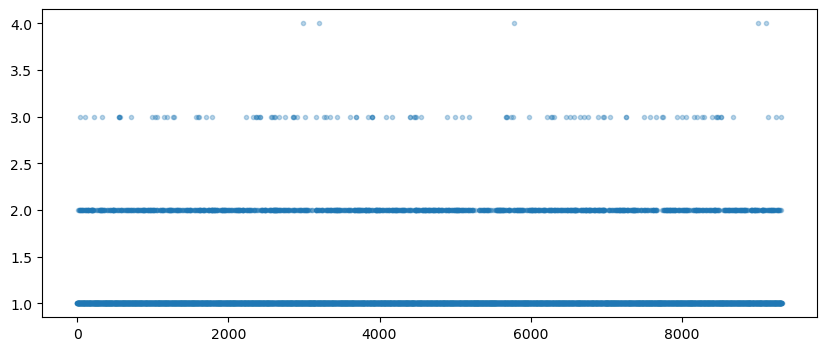

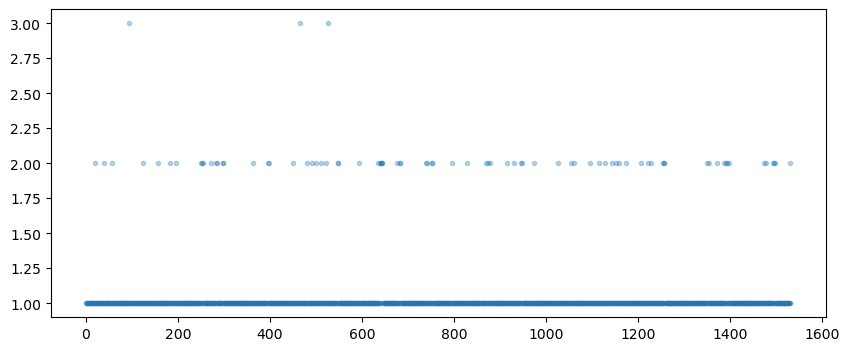

In [36]:
groups = df_NDR_sliding_windows.groupby(by='trans_id')

nor_nbr = []
for group in groups:
    nor_nbr.append(group[1]['NOR_nbr'].unique().shape[0])

plt.figure(figsize=(10,4))
plt.scatter(np.arange(df_NDR_sliding_windows['trans_id'].unique().shape[0]), nor_nbr, marker='.', alpha=0.3)

groups = df_NOR_sliding_windows.groupby(by='trans_id')

nor_nbr = []
for group in groups:
    nor_nbr.append(group[1]['NOR_nbr'].unique().shape[0])

plt.figure(figsize=(10,4))
plt.scatter(np.arange(df_NOR_sliding_windows['trans_id'].unique().shape[0]), nor_nbr, marker='.', alpha=0.3)

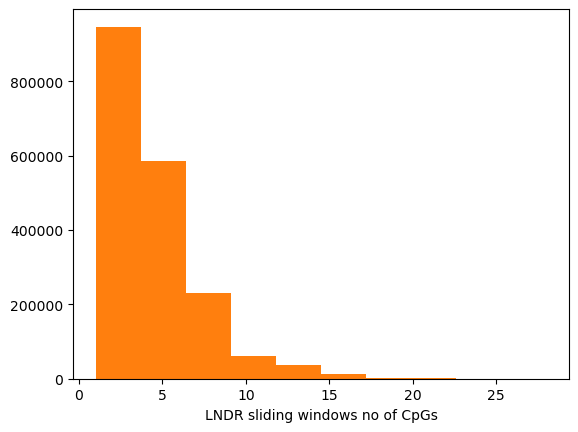

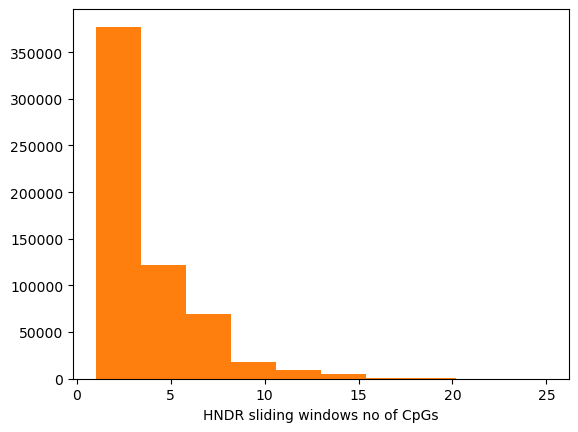

In [37]:
plt.figure()
_ = plt.hist(df_NDR_sliding_windows['nbr_meth_CpGs'])
_ = plt.hist(df_NDR_sliding_windows_random['nbr_meth_CpGs'])
_ = plt.xlabel('LNDR sliding windows no of CpGs')

plt.figure()
_ = plt.hist(df_NOR_sliding_windows['nbr_meth_CpGs'])
_ = plt.hist(df_NOR_sliding_windows_random['nbr_meth_CpGs'])
_ = plt.xlabel('HNDR sliding windows no of CpGs')

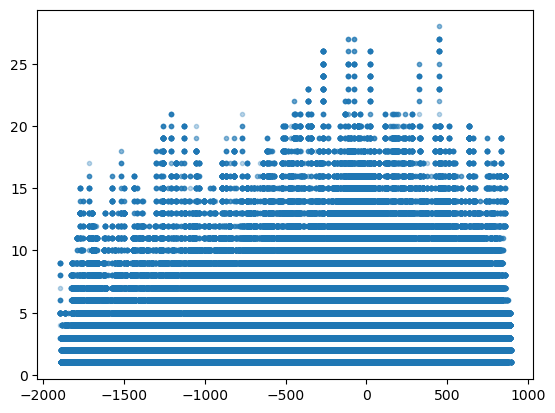

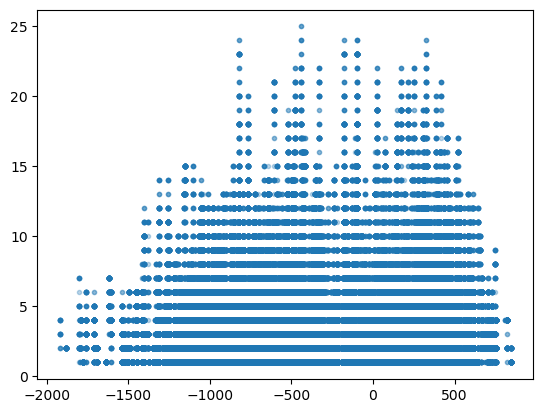

In [38]:
plt.figure()
plt.scatter(df_NDR_sliding_windows['nuc_rel_center'], df_NDR_sliding_windows['nbr_meth_CpGs'], 
            marker='.', alpha=0.3)

plt.figure()
plt.scatter(df_NOR_sliding_windows['nuc_rel_center'], df_NOR_sliding_windows['nbr_meth_CpGs'], 
            marker='.', alpha=0.3)


In [39]:
import re

def calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_in_window_tmp, meth_thres, clash_thres):    
    count_ident = 0
    cpg_positions = meth_in_window_tmp.keys()
    for meth_pos in cpg_positions:
        meth_rate = meth_in_window_tmp[meth_pos]
        clash_perc = x_y_clash_dict_norm[meth_pos] 
        
        if meth_rate > meth_thres:
            if clash_perc <= clash_thres:
                count_ident += 1
        else:
            if clash_perc > clash_thres:
                count_ident += 1
                
    nbr_cpgs = len(cpg_positions)
    perc_exp_clash_ident = float(count_ident)/float(nbr_cpgs)
    
    return perc_exp_clash_ident

def calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params):
    column_names = ["refid_NOR", "trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_CpGs", "nuc_rel_center", "nuc_region_length"] + params
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_refids = list(df_sliding_windows["refid"])
    all_NOR_nbrs = list(df_sliding_windows["NOR_nbr"])
    refid_NORs = []
    for ref, nor in zip(all_refids, all_NOR_nbrs):
        refid_NORs.append(str(ref)+"-"+str(nor))
    
    info_dict["refid_NOR"].extend(refid_NORs)
    info_dict["trans_id"].extend(list(df_sliding_windows["trans_id"]))
    info_dict["refid"].extend(all_refids)
    info_dict["NOR_nbr"].extend(all_NOR_nbrs)
    info_dict["window_nbr"].extend( list(df_sliding_windows["window_nbr"]))
    info_dict["nbr_CpGs"].extend(list(df_sliding_windows["nbr_meth_CpGs"])  )
    info_dict["nuc_region_length"].extend(list(df_sliding_windows["nuc_region_length"]))
    info_dict["nuc_rel_center"].extend(list(df_sliding_windows["nuc_rel_center"]))

    all_scores =  list(df_sliding_windows["meth_rates_window"]) #{34: 0.0, 35: 0.0,...}
    c = 0
    for row_df in tqdm(range(len(all_scores))):
        c += 1
        
        # meth_rates_window = ast.literal_eval(all_scores[row_df])
        meth_rates_window = all_scores[row_df]
    
        for param_str in params:
            clash_thres = float(re.findall(r'\d+', param_str)[0]) #c5m0
            meth_thres = float(re.findall(r'\d+', param_str)[1])
            
            perc_clash_ident = calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_rates_window, meth_thres, clash_thres)
            info_dict[param_str].append(perc_clash_ident)
            
    #Built dataframe 
    df_scores = pd.DataFrame(0, index = np.arange(len(info_dict[column_names[0]])),columns = column_names)
    for feat in column_names:
        df_scores[feat] = info_dict[feat]

    return df_scores

In [40]:
df_NDR_score_exp = calc_score_lists(df_NDR_sliding_windows, x_y_clash_dict_norm, params)

100%|██████████| 1879988/1879988 [01:01<00:00, 30750.08it/s]


In [41]:
df_NDR_score_random = calc_score_lists(df_NDR_sliding_windows_random, x_y_clash_dict_norm, params)

100%|██████████| 1879988/1879988 [01:01<00:00, 30515.65it/s]


In [42]:
df_NDR_score_exp.shape, df_NDR_score_random.shape

((1879988, 20), (1879988, 20))

In [43]:
df_NDR_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_rel_center,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_005489-1,NM_005489-130532573,NM_005489,1,43,1,-322.0,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,NM_005489-1,NM_005489-130532573,NM_005489,1,44,1,-322.0,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,NM_005489-1,NM_005489-130532573,NM_005489,1,45,1,-322.0,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NM_005489-1,NM_005489-130532573,NM_005489,1,46,1,-322.0,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NM_005489-1,NM_005489-130532573,NM_005489,1,47,1,-322.0,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_NOR_score_exp = calc_score_lists(df_NOR_sliding_windows, x_y_clash_dict_norm, params)

100%|██████████| 603610/603610 [00:19<00:00, 31126.17it/s]


In [45]:
df_NOR_score_random = calc_score_lists(df_NOR_sliding_windows_random, x_y_clash_dict_norm, params)

100%|██████████| 603610/603610 [00:19<00:00, 31344.43it/s]


In [46]:
df_NOR_score_exp.shape, df_NOR_score_random.shape

((603610, 20), (603610, 20))

In [47]:
df_NOR_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_rel_center,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_005760-1,NM_005760-37457739,NM_005760,1,1,3,-435.0,521,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333
1,NM_005760-1,NM_005760-37457739,NM_005760,1,2,3,-435.0,521,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333
2,NM_005760-1,NM_005760-37457739,NM_005760,1,3,3,-435.0,521,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000
3,NM_005760-1,NM_005760-37457739,NM_005760,1,4,3,-435.0,521,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
4,NM_005760-1,NM_005760-37457739,NM_005760,1,5,3,-435.0,521,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [48]:
def calculate_cohens_d(list_EXP,list_RAND):
    mEXP = np.mean(list_EXP)
    sdEXP = np.std(list_EXP)
    
    mRAND = np.mean(list_RAND)
    sdRAND = np.std(list_RAND)
    
    denom = np.sqrt(float(sdEXP**2 + sdRAND**2)/2.0)
    cohens_d = float(mEXP-mRAND)/float(denom + 1e-6)
    
    return cohens_d

def make_df_p_vals_cohens_d(df_scores_EXP, df_scores_RAND, params):
    column_names = ["nbr_CpGs", "parameter", "N_EXP", "N_RAND", "mean_EXP", "median_EXP", "std_EXP", "mean_RAND",
                    "median_RAND", "std_RAND", "cohens_d", "is_normal_EXP", "is_normal_RAND", "pval_ttest",
                    "t_stat", "pval_ranksums", "pval_ks_2samp"]
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []

    nbr_CpGs_list = list(set(list(df_scores_EXP["nbr_CpGs"])))

    for nbr_CpGs in nbr_CpGs_list:
        df_scores_EXP_tmp = df_scores_EXP.loc[df_scores_EXP["nbr_CpGs"] == nbr_CpGs]
        df_scores_RAND_tmp = df_scores_RAND.loc[df_scores_RAND["nbr_CpGs"] == nbr_CpGs]
                    
        for p in range(len(params)):
            par_name = params[p]
            EXP_scores = list(df_scores_EXP_tmp[par_name])
            RAND_scores = list(df_scores_RAND_tmp[par_name])
            
            info_dict["nbr_CpGs"].append(nbr_CpGs)
            info_dict["parameter"].append(par_name)
            
            info_dict["N_EXP"].append(len(EXP_scores))
            info_dict["N_RAND"].append(len(RAND_scores))
            
            info_dict["mean_EXP"].append(np.mean(EXP_scores))
            info_dict["median_EXP"].append(np.median(EXP_scores))
            info_dict["std_EXP"].append(np.std(EXP_scores))
            
            info_dict["mean_RAND"].append(np.mean(RAND_scores))
            info_dict["median_RAND"].append(np.median(RAND_scores))
            info_dict["std_RAND"].append(np.std(RAND_scores))
            
            #EFFECT SIZE
            cohens_d = calculate_cohens_d(EXP_scores, RAND_scores)
            info_dict["cohens_d"].append(cohens_d)
            
            #STAT TESTS
            #is normal distributed? This function tests the null hypothesis that a sample comes from a normal distribution. If small -> ost likely not normal dustributed
            pval_normal_EXP = stats.normaltest(EXP_scores)[1] if len(EXP_scores) >= 8 else -1
            pval_normal_RAND = stats.normaltest(RAND_scores)[1] if len(EXP_scores) >= 8 else -1
            
            #students t
            ttest_res = stats.ttest_ind(EXP_scores,RAND_scores,equal_var = False)
            t_stat = ttest_res[0]
            p_val_ttest = float(ttest_res[1])/2.0
            
            #ranksums, kstest
            ranksums = scipy.stats.ranksums(EXP_scores,RAND_scores)[1]
            ks_2samp = scipy.stats.ks_2samp(EXP_scores,RAND_scores)[1]
    
            info_dict["is_normal_EXP"].append(pval_normal_EXP)
            info_dict["is_normal_RAND"].append(pval_normal_RAND)
            info_dict["pval_ttest"].append(p_val_ttest)
            info_dict["t_stat"].append(t_stat)
            info_dict["pval_ranksums"].append(ranksums)
            info_dict["pval_ks_2samp"].append(ks_2samp)
            
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["nbr_CpGs"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [49]:
df_NDR_pvalues = make_df_p_vals_cohens_d(df_NDR_score_exp, df_NDR_score_random, params)

In [50]:
df_NDR_pvalues

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,324627,324627,0.548078,1.000000,0.497683,0.551599,1.000000,0.497330,-0.007077,0.0,0.0,0.002177,-2.851276,0.014012,0.035661
1,1,c5m10,324627,324627,0.548965,1.000000,0.497597,0.552234,1.000000,0.497264,-0.006570,0.0,0.0,0.004059,-2.647129,0.022566,0.062237
2,1,c5m20,324627,324627,0.565859,1.000000,0.495644,0.570932,1.000000,0.494943,-0.010243,0.0,0.0,0.000018,-4.126891,0.000400,0.000468
3,1,c10m0,324627,324627,0.530498,1.000000,0.499069,0.533015,1.000000,0.498909,-0.005044,0.0,0.0,0.021077,-2.031997,0.079054,0.254923
4,1,c10m10,324627,324627,0.531096,1.000000,0.499032,0.533428,1.000000,0.498881,-0.004674,0.0,0.0,0.029858,-1.882890,0.103688,0.340048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,28,c20m10,2,2,0.482143,0.482143,0.017857,0.589286,0.589286,0.017857,-5.999664,-1.0,-1.0,0.025658,-4.242641,0.121335,0.333333
332,28,c20m20,2,2,0.482143,0.482143,0.017857,0.589286,0.589286,0.017857,-5.999664,-1.0,-1.0,0.025658,-4.242641,0.121335,0.333333
333,28,c50m0,2,2,0.285714,0.285714,0.035714,0.500000,0.500000,0.035714,-5.999832,-1.0,-1.0,0.025658,-4.242641,0.121335,0.333333
334,28,c50m10,2,2,0.285714,0.285714,0.035714,0.500000,0.500000,0.035714,-5.999832,-1.0,-1.0,0.025658,-4.242641,0.121335,0.333333


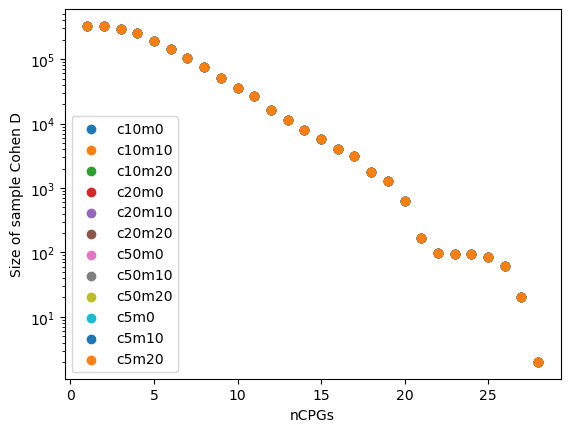

In [51]:
groups = df_NDR_pvalues.groupby(by='parameter')
for par, df_tmp in groups:
    plt.scatter(df_tmp['nbr_CpGs'], df_tmp['N_EXP'], label=par)
plt.legend()
plt.xlabel('nCPGs')
plt.ylabel('Size of sample Cohen D')
plt.yscale('log')

In [52]:
df_NOR_pvalues = make_df_p_vals_cohens_d(df_NOR_score_exp, df_NOR_score_random, params)

/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [53]:
df_NOR_pvalues

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,146736,146736,0.584533,1.00,0.492802,0.532071,1.00,0.498970,0.105791,0.0,0.0,1.228935e-180,28.655138,9.299030e-134,6.158713e-176
1,1,c5m10,146736,146736,0.585637,1.00,0.492612,0.532807,1.00,0.498923,0.106559,0.0,0.0,3.138635e-183,28.863063,1.298554e-135,2.075223e-178
2,1,c5m20,146736,146736,0.595416,1.00,0.490811,0.546437,1.00,0.497839,0.099080,0.0,0.0,9.230198e-159,26.837322,7.624893e-117,2.130229e-153
3,1,c10m0,146736,146736,0.553497,1.00,0.497130,0.519845,1.00,0.499606,0.067525,0.0,0.0,5.465763e-75,18.290049,3.762110e-56,1.271965e-72
4,1,c10m10,146736,146736,0.554193,1.00,0.497054,0.520363,1.00,0.499585,0.067887,0.0,0.0,9.018336e-76,18.388122,1.003888e-56,2.198162e-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25,c20m10,3,3,0.506667,0.52,0.018856,0.653333,0.68,0.067987,-2.939815,-1.0,-1.0,4.172197e-02,-2.939874,4.953461e-02,1.000000e-01
296,25,c20m20,3,3,0.586667,0.60,0.018856,0.573333,0.60,0.067987,0.267256,-1.0,-1.0,4.056566e-01,0.267261,8.272593e-01,1.000000e+00
297,25,c50m0,3,3,0.413333,0.44,0.099778,0.560000,0.56,0.000000,-2.078775,-1.0,-1.0,8.659468e-02,-2.078805,4.953461e-02,1.000000e-01
298,25,c50m10,3,3,0.413333,0.44,0.099778,0.560000,0.56,0.000000,-2.078775,-1.0,-1.0,8.659468e-02,-2.078805,4.953461e-02,1.000000e-01


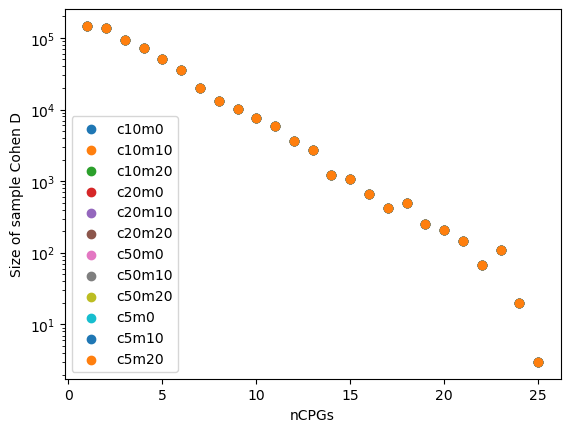

In [54]:
groups = df_NOR_pvalues.groupby(by='parameter')
for par, df_tmp in groups:
    plt.scatter(df_tmp['nbr_CpGs'], df_tmp['N_EXP'], label=par)
plt.legend()
plt.xlabel('nCPGs')
plt.ylabel('Size of sample Cohen D')
plt.yscale('log')

In [55]:
def plot_nbr_CpGs_cohensd(df_values, params):
    plt.figure(figsize=(15,7))
    ax = plt.subplot(1,1,1)
    
    nbr_CpGs_list = sorted(list(set(list(df_values["nbr_CpGs"]))))

    for par_name in params:
        
        df_values_tmp = df_values.loc[df_values["parameter"] == par_name]
        
        x_nbr_cpg_vals = list(df_values_tmp["nbr_CpGs"])
        y_cohens_d_vals = list(df_values_tmp["cohens_d"])
        
        if "m0" in par_name:
            c = "#117A65"
        if "m10" in par_name:
            c = "#45B39D"
        if "m20" in par_name:
            c = "#EB984E"
        if "c5" in par_name:
            m = "*"
            ms = 15
        if "c10" in par_name:
            m = "^"
            ms = 10
        if "c20" in par_name:
            m = "s"
            ms = 10
        if "c50" in par_name:
            m = "o"
            ms = 10
        
        
        plt.plot(x_nbr_cpg_vals, y_cohens_d_vals, linestyle="-", color=c, marker=m, markersize=ms, label=par_name)
    
    
    plt.axhline(y=0.2, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.5, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.8, linewidth=1, color = '#2C3E50',linestyle='--')
    
    e = 0.02
    ax.text(-1.8,0.2+e,"Small ES")
    ax.text(-1.8,0.5+e,"Medium ES")
    ax.text(-1.8,0.8+e,"Large ES")

    ax.set_ylabel("Cohen's d")
    ax.set_xlabel("Number of CpGs in sliding window")   

    plt.xlim(-2,35)
    plt.ylim(-3,3)

    legend = ax.legend(loc="lower left",ncol=4,frameon = 1,prop={'size':14})
    legend.get_frame().set_facecolor('white')

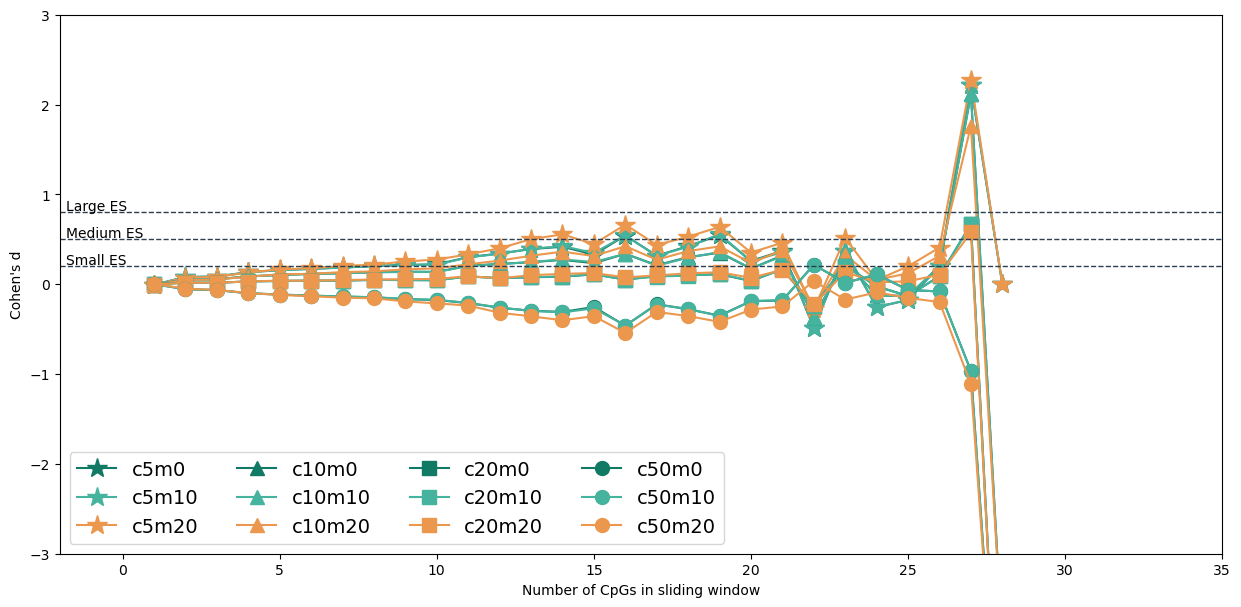

In [56]:
plot_nbr_CpGs_cohensd(df_NDR_pvalues, params)

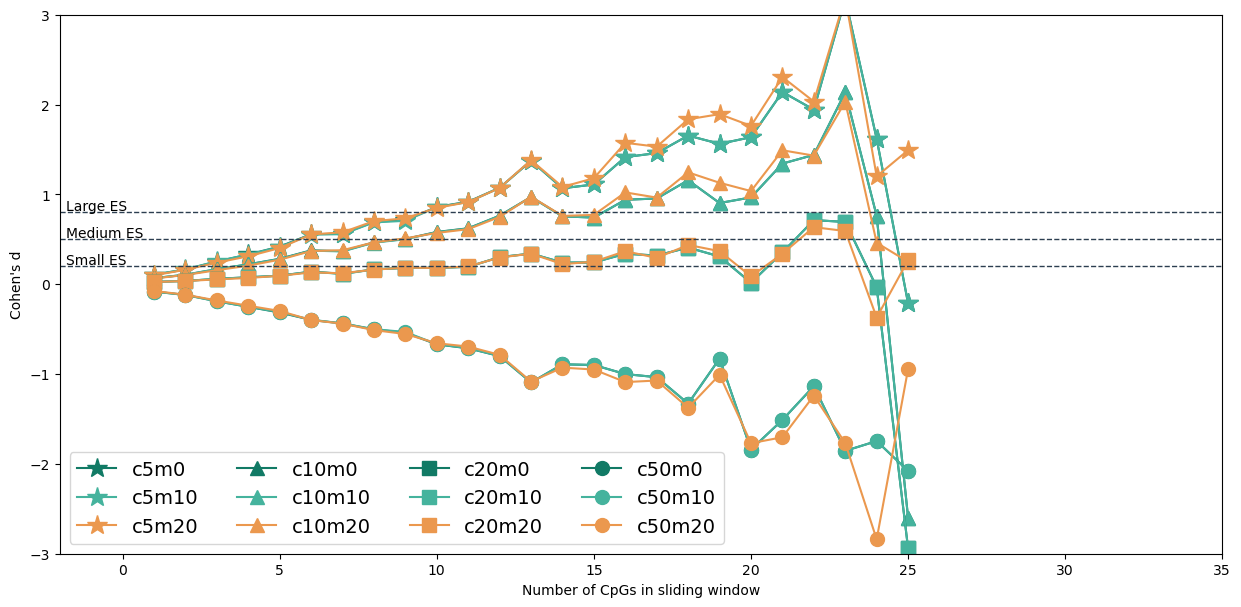

In [57]:
plot_nbr_CpGs_cohensd(df_NOR_pvalues, params)

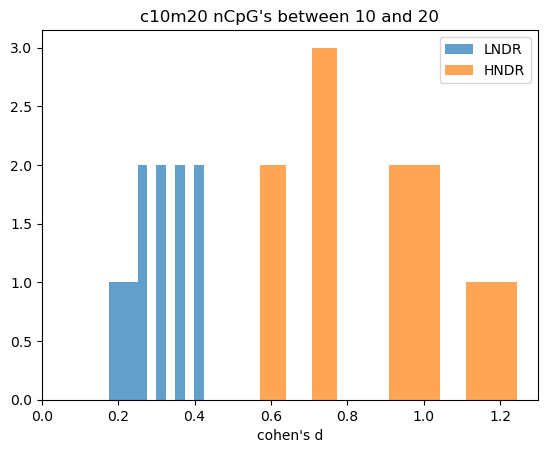

In [63]:
p = 'c10m20'
plt.hist(df_NDR_pvalues[np.logical_and(df_NDR_pvalues['nbr_CpGs'].between(10,20), df_NDR_pvalues['parameter'] == p)]['cohens_d'], label='LNDR', alpha=0.7)
plt.hist(df_NOR_pvalues[np.logical_and(df_NOR_pvalues['nbr_CpGs'].between(10,20), df_NOR_pvalues['parameter'] == p)]['cohens_d'], label='HNDR', alpha=0.7)
plt.legend()
plt.xlim(0)
plt.title(f'{p} nCpG\'s between 10 and 20')
plt.xlabel('cohen\'s d')
plt.show()  

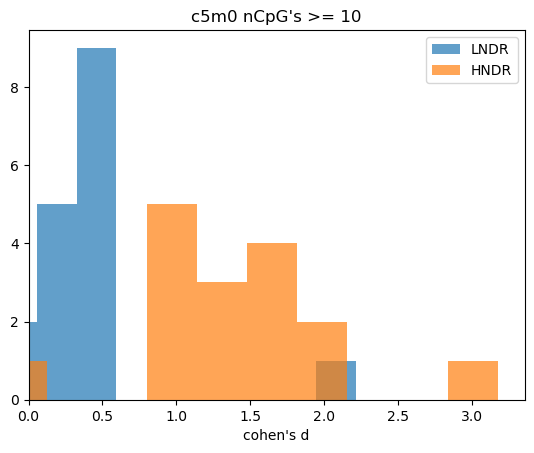

In [64]:
p = 'c5m0'
plt.hist(df_NDR_pvalues[np.logical_and(df_NDR_pvalues['nbr_CpGs'] >= 10, df_NDR_pvalues['parameter'] == p)]['cohens_d'], label='LNDR', alpha=0.7)
plt.hist(df_NOR_pvalues[np.logical_and(df_NOR_pvalues['nbr_CpGs'] >= 10, df_NOR_pvalues['parameter'] == p)]['cohens_d'], label='HNDR', alpha=0.7)
plt.legend()
plt.xlim(0)
plt.title(f'{p} nCpG\'s >= 10')
plt.xlabel('cohen\'s d')
plt.show()  

In [ ]:
df_NOR_pvalues[np.logical_and(df_NOR_pvalues['nbr_CpGs'] >= 10, df_NOR_pvalues['parameter'] == 'c5m0')]